### Team Amazing Grace

#### Analysis of account transations from 'X' Bank. 

In [32]:
# Import Pandas, our tool for creating a datafrom from the comma separated values file
import pandas as pd
# Import Matplotlib, our tool for creating visual tools for analyzing the data within the dataframe
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Load the data into a dataframe 
data = pd.read_csv('transactions.csv')

In [259]:
data

,client_id,amount,date,time
0,986,486.0,6/10/2020,23:47
1,992,802.0,12/26/2020,22:28
2,991,461.0,8/19/2020,22:02
3,987,488.0,8/3/2020,22:44
4,991,438.0,5/27/2020,23:58
...,...,...,...,...
33618,85,-1893.0,7/10/2020,8:19
33619,663,-1557.0,9/13/2020,20:34
33620,626,-1451.0,4/12/2020,11:49
33621,685,-1852.0,6/22/2020,19:01


In [7]:
# Observe how many null spaces there are
data.isnull().sum()

Unnamed: 0    0
client_id     0
amount        0
date          0
time          0
dtype: int64

In [262]:
# Observe how many missing values there are
data.count()

client_id    33623
amount       33623
date         33623
time         33623
dtype: int64

In [17]:
# Drop the strange column that appears to be an artifact of the list creation
data = data.drop('Unnamed: 0', axis=1)

In [20]:
data.tail()

,client_id,amount,date,time
33618,85,-1893.0,7/10/2020,8:19
33619,663,-1557.0,9/13/2020,20:34
33620,626,-1451.0,4/12/2020,11:49
33621,685,-1852.0,6/22/2020,19:01
33622,216,-1177.0,12/29/2020,5:03


In [263]:
# I'm dealing with a very small dataset, so I can perform initial EDA on the whole set instead of stochastically. 

In [29]:
# First EDA, observe net dollars, summing everything sent and received from each of the accounts. 
sums = data.groupby('client_id').sum()
sums

,amount
client_id,
1,-3844.30
2,888.46
3,3831.77
4,295.82
5,976.92
...,...
995,-1332.00
996,-6000.00
997,-11500.00


In [40]:
# Observe basic facts amount net sums per account. 
mean = sums.amount.mean()
minimum = sums.amount.min()
maximum = sums.amount.max()
print("Amount mean: ", mean, "Minimum: ", minimum, "Maximum ", maximum)

Amount mean:  39.29210420841691 Minimum:  -18097.18 Maximum  127024.0


In [36]:
# Create a plot to observe any outliers
a = sums.index
b = sums['amount']

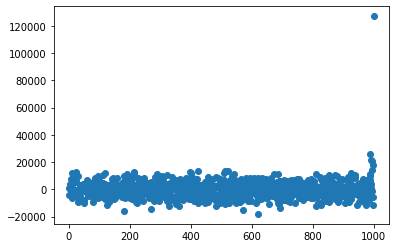

In [50]:
plt.scatter(a,b)


##### There is one massive positive outlier, as well as several positive and negative outliers. 
##### Before performing deeply nuanced EDA to deduce patterns in the data, for instance heavy feature selection and a colour heat map, client_id 999 is such an extreme outlier that it will need to be eliminated so that it does not throw off statistics. Thus, client_id 999 is worth further investigation to first determine if it is possibly a suspicious account. 

In [264]:
# The first EDA is to observe 999's deposits/ income. Is there any outright observable pattern?
# As user_id's "amount" column relates to money, this column will be split into positive and negative. All money that comes in, versus money that goes out. 
earnings_999 = data[(data.client_id == 999) & (data.amount > 0)]
earnings_999

,client_id,amount,date,time
4000,999,500.0,12/10/2020,10:23
4001,999,500.0,9/24/2020,15:48
4002,999,500.0,6/9/2020,8:47
4003,999,500.0,7/17/2020,23:15
4004,999,500.0,4/21/2020,17:52
...,...,...,...,...
4995,999,500.0,1/24/2020,7:30
4996,999,500.0,11/28/2020,15:44
4997,999,500.0,11/3/2020,22:59
4998,999,500.0,7/18/2020,11:47


In [265]:
# Just by casual witness, client_id 999's deposits seem to be utterly distinct. To explore this further...
mean_999 = earnings_999.amount.mean()
max_999 = earnings_999.amount.max()
min_999 = earnings_999.amount.min()
print("Client '999' deposits. Mean:", mean_999, " Max:", max_999, " Min:", min_999)

Client '999' deposits. Mean: 500.0  Max: 500.0  Min: 500.0


In [69]:
# All of user_id 999's deposits from every source is 500$. 
# Second EDA is to observe 999's withdrawals/ transfers. 
expenses_999 = data[(data.client_id == 999) & (data.amount < 0)]
expenses_999.tail(10)

,client_id,amount,date,time
6113,999,-1034.0,11/5/2020,7:05
6114,999,-214.0,8/6/2020,12:15
6115,999,-544.0,11/6/2020,2:59
6116,999,-2467.0,12/10/2020,0:11
6117,999,-1260.0,3/3/2020,15:04
6118,999,-2908.0,7/24/2020,4:46
6119,999,-2846.0,4/16/2020,22:58
6120,999,-1108.0,3/8/2020,8:33
6121,999,-4974.0,5/3/2020,1:15
6122,999,-3067.0,1/18/2020,11:25


In [268]:
mean_x_999 = expenses_999.amount.mean()
max_x_999 = expenses_999.amount.max()
min_x_999 = expenses_999.amount.min()
print("Client '999' withdrawals. Mean:", mean_x_999, " Max:", max_x_999, " Min:", min_x_999)
print("Total number of transactions: ", data['amount'][data.client_id == 999].count())

Client '999' withdrawals. Mean: -334.8078994614004  Max: -1.0  Min: -4988.0
Total number of transactions:  2123


##### user_id 999 is definitely an anomaly, very likely a corporate entity and not a single human due to gross volume and magnitude of activity. 
##### Five hundred dollars could be the net income earned from a product or service being sold. For instance, if user_id 999 is the owner of a car lot, then he/she earns 500 dollars everytime a car is sold. 

In [269]:
# If '999' is depositing 500$ repeatedly, are there other accounts with 500$ withdrawals; which could be transfers.
five_hundred = data['client_id'][data['amount'] == -500].unique()
five_hundred

array([989, 992, 987, 995, 988, 994, 986, 990, 993, 991, 996, 997, 998])

In [177]:
# A deposit or withdrawal of 500$ is not by itself anything irregular. Now to determine who, if any, has a preponderance for depositing this amount. 
for i in five_hundred:
    print(i, data['amount'][(data.client_id == i) & (data.amount == -500)].sum())

989 -48500.0
992 -49500.0
987 -44500.0
995 -51000.0
988 -52000.0
994 -50500.0
986 -57000.0
990 -47000.0
993 -45000.0
991 -55000.0
996 -162500.0
997 -174500.0
998 -163000.0


In [181]:
# Quite strangely, there are a group of individuals who all withdrew 500$ repeatedly. Further observation of each individual account necessary. 
for i in five_hundred:
    print(data[(data['client_id'] == i) & (data.amount < 0)]['amount'].unique())

[-500.]
[-500.]
[-500.]
[-500.]
[-500.]
[-500.]
[-500.]
[-500.]
[-500.]
[-500.]
[-500.]
[-500.]
[-500.]


In [187]:
# All accounts have only withdrew 500$. Thus none of them are personal accounts showing typical life expenses. 
# Very likely all of these accounts are interlinked, for instance all working at the same car dealership. 
# Further exploration required. 

for i in five_hundred:
    print(data[(data['client_id'] == i) & (data.amount > 0)]['amount'].unique())

[724. 824. 244. 837. 334. 787. 912. 631. 519. 317. 718. 238. 464. 471.
 812. 798. 495. 323. 474. 461. 845. 505. 608. 533. 995. 546. 989. 412.
 463. 336. 903. 565. 752. 388. 224. 693. 918. 854. 304. 988. 958. 835.
 610. 652. 601. 779. 957. 632. 547. 683. 754. 275. 433. 254. 425. 360.
 847. 682. 997. 437. 273. 305. 408. 404. 213. 397. 784. 846. 872. 475.
 378. 726. 952. 946. 382. 967. 252. 384. 810. 289. 763. 698. 966. 743.
 914. 725. 386. 863. 277. 466. 788. 759. 679.]
[ 802.  477.  282.  446. 1000.  222.  324.  328.  265.  487.  695.  805.
  968.  334.  561.  414.  355.  578.  838.  865.  407.  668.  837.  666.
  816.  471.  722.  257.  759.  398.  201.  449.  420.  730.  850.  472.
  893.  415.  457.  340.  820.  483.  217.  533.  224.  645.  769.  528.
  913.  399.  427.  878.  926.  696.  374.  548.  641.  530.  610.  672.
  776.  986.  912.  453.  810.  502.  935.  987.  763.  966.  358.  617.
  694.  237.  572.  799.  746.  441.  989.  658.  211.]
[488. 411. 484. 878. 597. 596. 67

In [245]:
# Thus a telling story arises. 
# Accounts 986 - 995 make deposits between (approximately) 200 and 1000, but only withdraw 500$. 
# Accounts 996, 997, 998 make deposits of 500$ and withdrawals of 500$. 
# Account 999 only deposits 500$ and withdraws a wide range of values. 

In [247]:
# One last piece of EDA, to further determine the anomalous nature of client_id's 985-999. 
# Observe how much activity each account has.
data.client_id.value_counts().head(20)

999    2123
998     687
997     675
996     638
986     226
994     203
991     201
990     201
988     201
987     199
993     195
989     194
995     191
992     189
708      45
303      44
214      43
344      43
413      43
957      43
Name: client_id, dtype: int64

In [248]:
# Another telling pattern emerges. These client_id's are especially active, relative to all other accounts. 
data.client_id.value_counts().mean()

33.690380761523045

##### It is now extremely probably that accounts 985-999 are related to each other. 'X' Bank would know what types of deposits/ withdrawals were related the numbers associated with these transactions. Thus if they are transfers or all dealing with cash movements, these accounts have a strong chance to belong to a criminal network, possibly a human trafficking network. 




#### Accounts 986-999 follow, exactly, all the hallmarks of the three tiers of account holders in our hypothesis. These accounts and their patterns would be returned to the bank whence they came for official follow up. 

##### As there is little time left to polish the team's submission; no further EDA undertaken. 